In [1]:
import pandas as pd
from utils import *
years = [2021,2022]
data = pd.read_csv('../full_data_2020.csv')
for year in years:
    data = pd.concat([data, pd.read_csv('../full_data_{}.csv'.format(year))])
data

,station_id,year,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,percentage_docks_available,...,altitude,post_code,capacity,mm_precip,temperature,rating,ocio,carriles,time,festius
0,1.0,2020,1.0,1.0,2.0,0.522727,0.503788,0.469697,0.403409,0.354167,...,16.0,8013,45,0.0,5.75,6.0,88.0,6.0,2,1
1,1.0,2020,1.0,1.0,7.0,0.289773,0.373106,0.304924,0.238636,0.240530,...,16.0,8013,45,0.0,4.25,6.0,88.0,6.0,7,1
2,1.0,2020,1.0,1.0,12.0,0.253788,0.268939,0.350379,0.344697,0.393939,...,16.0,8013,45,0.0,12.45,6.0,88.0,6.0,12,1
3,1.0,2020,1.0,1.0,17.0,0.390152,0.346591,0.255814,0.220930,0.186047,...,16.0,8013,45,0.0,9.35,6.0,88.0,6.0,17,1
4,1.0,2020,1.0,1.0,22.0,0.083333,0.218992,0.437984,0.515504,0.470930,...,16.0,8013,45,0.0,6.80,6.0,88.0,6.0,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877924,519.0,2022,12.0,31.0,0.0,0.947917,0.916667,0.965278,0.881944,0.798611,...,110.0,8032,24,0.0,16.00,10.0,52.0,1.0,26280,0
877925,519.0,2022,12.0,31.0,5.0,0.819444,0.791667,0.791667,0.791667,0.791667,...,110.0,8032,24,0.0,16.45,10.0,52.0,1.0,26285,0
877926,519.0,2022,12.0,31.0,10.0,0.802083,0.833333,0.871528,0.902778,0.965278,...,110.0,8032,24,0.0,20.35,10.0,52.0,1.0,26290,0
877927,519.0,2022,12.0,31.0,15.0,1.000000,1.000000,0.965278,0.944444,0.944444,...,110.0,8032,24,0.0,19.20,10.0,52.0,1.0,26295,0


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()
X_train = data.drop(['percentage_docks_available'], axis=1)
#X_train = X_train.drop(['time'], axis = 1)
y_train = data['percentage_docks_available']
X_train = X_train.drop(['station_id'], axis = 1)
'''
####
cat_cols = ['post_code','festius']
num_cols = [feat for feat in X_train.columns if feat not in cat_cols]
print(num_cols)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train_cat = encoder.fit_transform(data[cat_cols])
encoded_columns = encoder.get_feature_names_out(cat_cols)
X_train_cat = pd.DataFrame(X_train_cat, columns = encoded_columns)
#X_train_encoded = pd.concat([X_train[num_cols].reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_train_encoded = pd.merge(X_train[num_cols], X_train_cat, left_index=True, right_index = True)
####
'''
X_train_encoded = encode_scale(X_train, encoder = encoder, scaler = scaler, func = 'train')
X_train_encoded

/Users/alejandro/miniconda3/envs/PG/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,post_code_8001,post_code_8002,post_code_8003,post_code_8004,post_code_8005,post_code_8006,post_code_8007,post_code_8008,post_code_8009,post_code_8010,...,lat,lon,altitude,capacity,mm_precip,temperature,rating,ocio,carriles,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-1.850198,-1.030230,0.161318,1.001563,-1.898049
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-2.079169,-1.030230,0.161318,1.001563,-1.897365
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-0.827458,-1.030230,0.161318,1.001563,-1.896681
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-1.300666,-1.030230,0.161318,1.001563,-1.895997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-1.689918,-1.030230,0.161318,1.001563,-1.895313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,-0.285558,-0.799027,-0.893812,-1.080008,1.696421
877925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,-0.216867,-0.799027,-0.893812,-1.080008,1.697105
877926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,0.378459,-0.799027,-0.893812,-1.080008,1.697789
877927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,0.202915,-0.799027,-0.893812,-1.080008,1.698473


In [3]:
X_train_encoded.columns

Index(['post_code_8001', 'post_code_8002', 'post_code_8003', 'post_code_8004',
       'post_code_8005', 'post_code_8006', 'post_code_8007', 'post_code_8008',
       'post_code_8009', 'post_code_8010', 'post_code_8011', 'post_code_8012',
       'post_code_8013', 'post_code_8014', 'post_code_8015', 'post_code_8016',
       'post_code_8017', 'post_code_8018', 'post_code_8019', 'post_code_8020',
       'post_code_8021', 'post_code_8022', 'post_code_8023', 'post_code_8024',
       'post_code_8025', 'post_code_8026', 'post_code_8027', 'post_code_8028',
       'post_code_8029', 'post_code_8030', 'post_code_8031', 'post_code_8032',
       'post_code_8033', 'post_code_8034', 'post_code_8035', 'post_code_8036',
       'post_code_8037', 'post_code_8038', 'post_code_8039', 'post_code_8040',
       'post_code_8041', 'post_code_8042', 'post_code_8930', 'festius_0',
       'festius_1', 'year', 'month', 'day', 'hour', 'ctx-4', 'ctx-3', 'ctx-2',
       'ctx-1', 'lat', 'lon', 'altitude', 'capacity', 'mm

In [4]:
df_test = pd.read_csv('../full_data_2022.csv')
X_test = df_test[df_test['month'] == 1]
#X_train = X_train.drop(['time'], axis = 1)
y_test = X_test['percentage_docks_available']
X_test = X_test.drop(['percentage_docks_available'], axis=1)
X_test = X_test.drop(['station_id'], axis = 1)
'''
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test_cat = encoder.transform(df_test[cat_cols])
encoded_columns = encoder.get_feature_names_out(cat_cols)
X_test_cat = pd.DataFrame(X_test_cat, columns = encoded_columns)
X_test_encoded = pd.merge(X_test[num_cols], X_test_cat, left_index=True, right_index = True)
#X_test_encoded = pd.concat([X_test[num_cols].reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)
####
###
'''
X_test_encoded = encode_scale(X_test, encoder = encoder, scaler = scaler, func = 'test')

#X_test_encoded = X_test_encoded[X_test_encoded['month'] == 2]
X_test_encoded

,post_code_8001,post_code_8002,post_code_8003,post_code_8004,post_code_8005,post_code_8006,post_code_8007,post_code_8008,post_code_8009,post_code_8010,...,lat,lon,altitude,capacity,mm_precip,temperature,rating,ocio,carriles,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-1.674653,-1.030230,0.161318,1.001563,0.501730
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-1.758609,-1.030230,0.161318,1.001563,0.502414
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-0.186337,-1.030230,0.161318,1.001563,0.503098
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-0.690075,-1.030230,0.161318,1.001563,0.503782
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078233,0.475724,-0.587839,2.706074,-0.088252,-1.201445,-1.030230,0.161318,1.001563,0.504466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,-0.850355,-0.799027,-0.893812,-1.080008,0.599942
876326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,-1.125121,-0.799027,-0.893812,-1.080008,0.600626
876327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,-0.667178,-0.799027,-0.893812,-1.080008,0.601310
876328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196128,-0.090694,2.365795,-0.470588,-0.088252,-0.590854,-0.799027,-0.893812,-1.080008,0.601994


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = LinearRegression()

model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
r2

0.8099488299720694

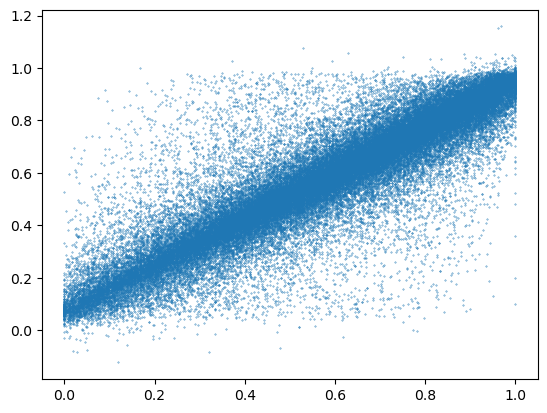

In [6]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, s = 0.1)

In [9]:
scores = cross_validation_model(X = X_train_encoded, y = y_train, k = 5, model = LinearRegression())

In [10]:
scores

{'r2_mean': 0.8376186495923188,
 'r2_std': 0.0006043438784849024,
 'mse_mean': 0.01335400119114149,
 'mse_std': 5.32567119228006e-05}

In [9]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=250, learning_rate=0.05, n_jobs=10)

scores = cross_validation_model(X = X_train_encoded, y = y_train, k = 5, model = xgbr)

In [10]:
scores

{'r2_mean': 0.859496973705496,
 'r2_std': 0.0005023049670279804,
 'mse_mean': 0.01155475859864669,
 'mse_std': 4.4077308030969226e-05}